In [1]:
import onnxruntime as ort
import onnx
import numpy as np
from georef import generate
import os
import torch
import cv2
import matplotlib.pyplot as plt

from onnx_util import YOLOv8

%matplotlib inline

print("Using " + "CUDA" if torch.cuda.is_available() else "CPU")

Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)
Using CUDA


In [2]:
# Load and check the onnx model
model = "../models/best_yolov8_visdrone207212.onnx"
img = "../assets/153/153_src.jpg"
conf_thres = 0.5
iou_thres = 0.5

# onnx_model: Path to the ONNX model.
# input_image: Path to the input image.
# confidence_thres: Confidence threshold for filtering detections.
# iou_thres: IoU (Intersection over Union) threshold for non-maximum suppression.

detection = YOLOv8(model, img, conf_thres, iou_thres)

# Display the detection results
output_image = detection.main()

Output image shape (1080, 1920, 3)


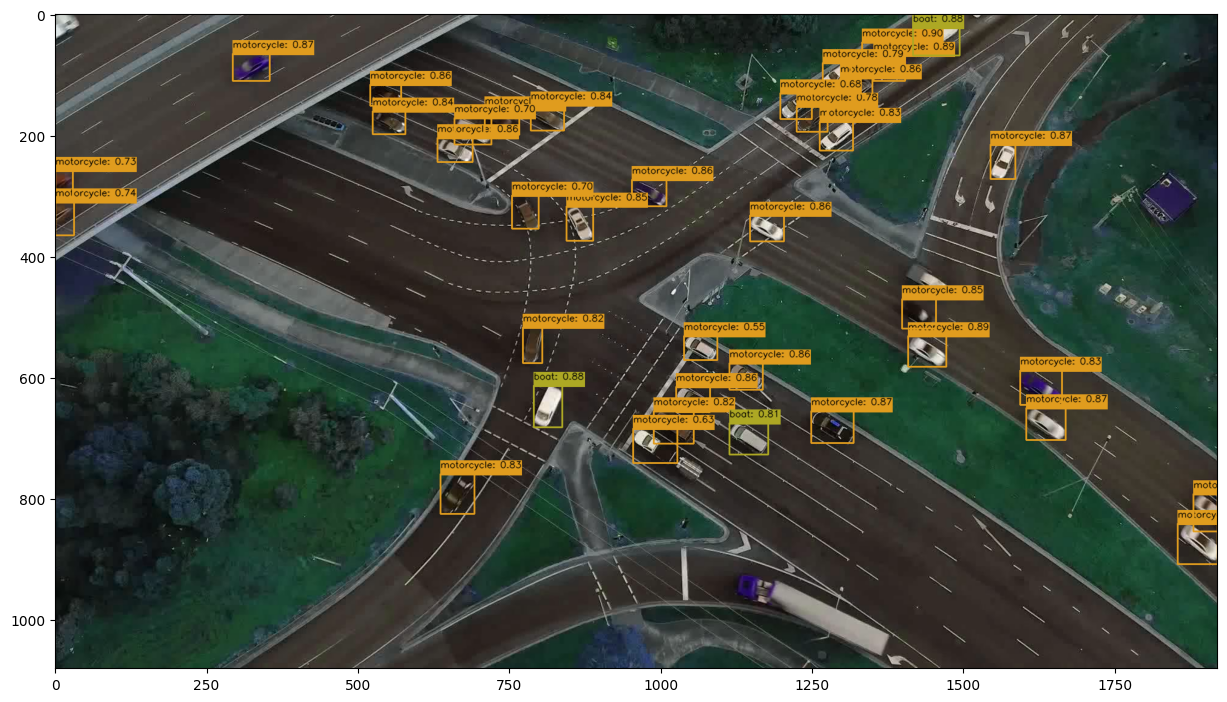

In [6]:
print("Output image shape", output_image.shape)
fig = plt.figure(figsize=(15, 15))  
plt.imshow(output_image)
plt.show()

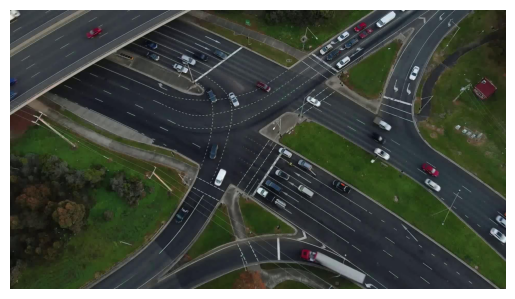

Original resolution:  (1080, 1920)


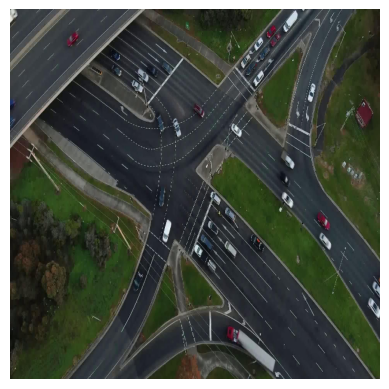

Resized resolution:  (640, 640, 3)


In [7]:
img = cv2.imread("../assets/153/153_src.jpg")

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not open or find the image.")
else:
    # Convert the image from BGR to RGB (Matplotlib expects RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image using Matplotlib
    plt.axis('off')  # Turn off axis labels
    plt.imshow(img)
    plt.show()
    original_res = img.shape[:2]
    print("Original resolution: ", original_res)
    resized_image = cv2.resize(img, (640, 640))
    plt.axis('off')  # Turn off axis labels
    plt.imshow(resized_image)
    plt.show()
    


In [33]:
inputTensor = np.array(resized_image, dtype=np.float32)
# Reshape the input tensor to match the model's input dimensions
inputTensor = np.expand_dims(inputTensor, axis=0)
inputTensor = np.transpose(inputTensor, [0, 3, 1, 2])
print("Input tensor shape: ", inputTensor.shape)



# providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'] or ['CPUExecutionProvider']
session = ort.InferenceSession("../models/best_yolov8_visdrone207212.onnx", providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
# outputs = session.run(None, {"images": inputTensor})



In [23]:
print("Output shapes: ", [output.shape for output in outputs])

output = outputs[0][0]
output = output.T
print("Output shape: ", output.shape)
boxes_xywh = output[..., :4]
scores = np.max(output[..., 4:], axis=1)
classes = np.argmax(output[..., 4:], axis=1)

print("Boxes shape: ", boxes_xywh.shape)
print("Scores shape: ", scores.shape)
print("Classes shape: ", classes.shape)



Output shapes:  [(1, 13, 8400)]
Output shape:  (8400, 13)
Boxes shape:  (8400, 4)
Scores shape:  (8400,)
Classes shape:  (8400,)


Exception: File `'(model,'` not found.